                Human Cognitive Performance Analysis

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/Users/kushbajpai/Downloads/Cognitive.csv')
display(df.head(10))
display(df.tail())

,User_ID,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
0,U1,57,Female,6.5,3.0,Non-Vegetarian,6.5,Medium,41,583.33,65,36.71,39.77
1,U2,39,Female,7.6,9.0,Non-Vegetarian,10.8,High,214,368.24,58,54.35,57.68
2,U3,26,Male,8.2,6.0,Vegetarian,5.7,Low,429,445.21,49,32.57,29.54
3,U4,32,Male,7.8,9.0,NaN,8.3,Low,464,286.33,94,70.15,74.59
4,U5,50,Male,9.7,2.0,Non-Vegetarian,11.3,Medium,365,237.65,62,87.54,91.78
5,U6,36,Female,NaN,10.0,Vegan,6.6,NaN,381,453.43,70,31.71,32.77
6,U7,48,Male,6.7,2.0,Vegan,1.4,Low,39,407.13,51,59.17,55.92
7,U8,35,Female,6.0,1.0,Vegan,6.8,Medium,2,298.46,60,85.02,81.45
8,U9,29,Male,5.1,6.0,Non-Vegetarian,10.2,Low,244,380.08,82,50.67,54.17
9,U10,57,Female,7.9,9.0,NaN,9.1,High,355,417.96,54,44.39,43.88


,User_ID,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
80049,U29698,43,Female,6.7,7.0,Non-Vegetarian,2.9,Medium,20,490.90,72,53.83,48.99
80050,U62992,56,Female,7.2,8.0,Non-Vegetarian,8.4,Medium,344,251.12,87,85.57,86.15
80051,U40721,20,Female,9.6,3.0,Vegetarian,12.0,High,401,482.21,66,49.81,50.21
80052,U78800,58,Male,7.9,10.0,Vegan,11.5,Medium,49,545.11,93,38.22,42.29
80053,U78669,48,Male,4.1,9.0,Non-Vegetarian,7.3,Medium,391,339.47,53,46.35,48.16


UNDERSTANDING THE DATASET

In [3]:
print(df.shape)
print(df.dtypes)
print(f'\nNull Values :- \n{df.isna().sum()}\n')
print(f'Duplicates:-  {df.duplicated().sum()}')

(80054, 13)
User_ID                object
Age                     int64
Gender                 object
Sleep_Duration        float64
Stress_Level          float64
Diet_Type              object
Daily_Screen_Time     float64
Exercise_Frequency     object
Caffeine_Intake         int64
Reaction_Time         float64
Memory_Test_Score       int64
Cognitive_Score       float64
AI_Predicted_Score    float64
dtype: object

Null Values :- 
User_ID                  0
Age                      0
Gender                   0
Sleep_Duration        4549
Stress_Level          4549
Diet_Type             4549
Daily_Screen_Time     4549
Exercise_Frequency    4549
Caffeine_Intake          0
Reaction_Time            0
Memory_Test_Score        0
Cognitive_Score          0
AI_Predicted_Score       0
dtype: int64

Duplicates:-  31


DATA CLEANING

In [4]:
df.drop_duplicates(inplace=True)

df['Sleep_Duration'] = df['Sleep_Duration'].replace(r'[^\d.]', '', regex=True)
df['Sleep_Duration'] = df['Sleep_Duration'].replace('', float(np.nan))
df['Sleep_Duration'] = df['Sleep_Duration'].astype(float)

df['Sleep_Duration'].fillna(df['Sleep_Duration'].mean(), inplace=True)

df['Stress_Level'].fillna(df['Stress_Level'].mean(), inplace=True)

diet = ['Non vegeterian','vegeterian','Vegan']
df['Diet_Type'] = df['Diet_Type'].apply(lambda x: random.choice(diet) if pd.isna(x)else x)

df['Daily_Screen_Time'].fillna(df['Daily_Screen_Time'].mean(),inplace=True)

exercise = ['High','medium','low']
df['Exercise_Frequency'] = df['Exercise_Frequency'].apply(lambda x:random.choice(exercise)if pd.isna(x)else x)

print('Null Values:')
print(df.isna().sum())
print('\nDuplicates:')
print(df.duplicated().sum())

df.to_csv("Cleaned_Cognitive.csv", index=False)

Null Values:
User_ID               0
Age                   0
Gender                0
Sleep_Duration        0
Stress_Level          0
Diet_Type             0
Daily_Screen_Time     0
Exercise_Frequency    0
Caffeine_Intake       0
Reaction_Time         0
Memory_Test_Score     0
Cognitive_Score       0
AI_Predicted_Score    0
dtype: int64

Duplicates:
0


/var/folders/gy/fkvds6g14rldygc96ngnmzpw0000gn/T/ipykernel_19788/3634213302.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep_Duration'].fillna(df['Sleep_Duration'].mean(), inplace=True)
/var/folders/gy/fkvds6g14rldygc96ngnmzpw0000gn/T/ipykernel_19788/3634213302.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

RENAMING COLUMNS

In [5]:
df = df.rename(columns={
    'User_ID':'User ID',
    'Sleep_Duration' : 'Sleep Hours',
    'Stress_Level' : 'Stress Level',
    'Diet_Type' : 'Diet Type',
    'Daily_Screen_Time':'Daily Screen Time(hrs)',
    'Exercise_Frequency':'Exercise Frequency',
    'Caffeine_Intake' : 'Caffeine Intake (in mg)',
    'Reaction_Time' : 'Reaction Time(in ms)' ,
    'Memory_Test_Score':'Memory Test Score (out of 100)' ,
    'Cognitive_Score' : 'Cognitive Score (out of 100)',
    'AI_Predicted_Score':'AI Predicted Score'
    
})
df.head(10)

df.to_csv("Cleaned_Cognitive.csv", index=False)

UNIVARIATE ANALYSIS

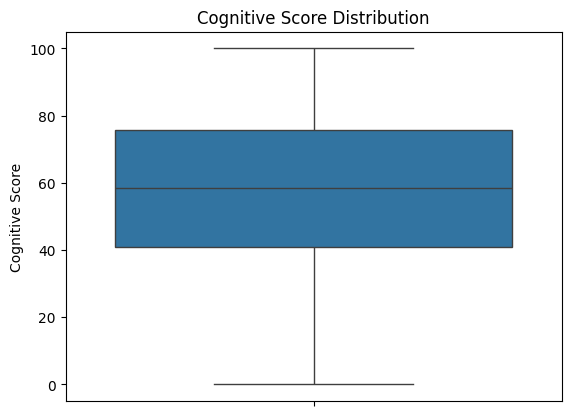

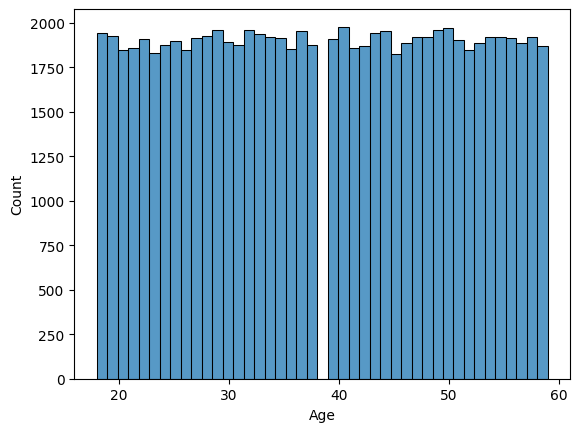

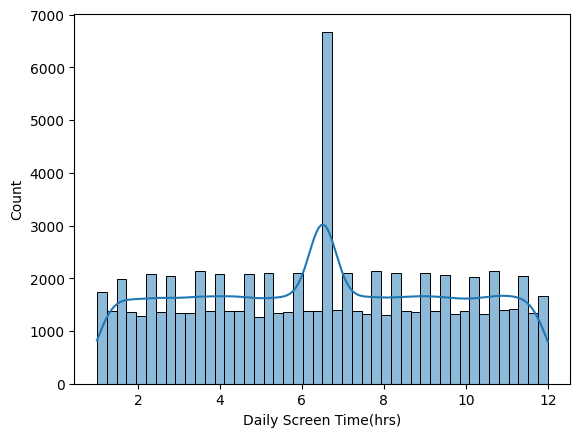

In [6]:
sns.boxplot(data=df, y='Cognitive Score (out of 100)')
plt.title('Cognitive Score Distribution')
plt.ylabel('Cognitive Score')
plt.show()

sns.histplot(data=df, x='Age',)
plt.show()

sns.histplot(data=df, x='Daily Screen Time(hrs)',kde=True)
plt.show()

BIVARIATE ANALYSIS

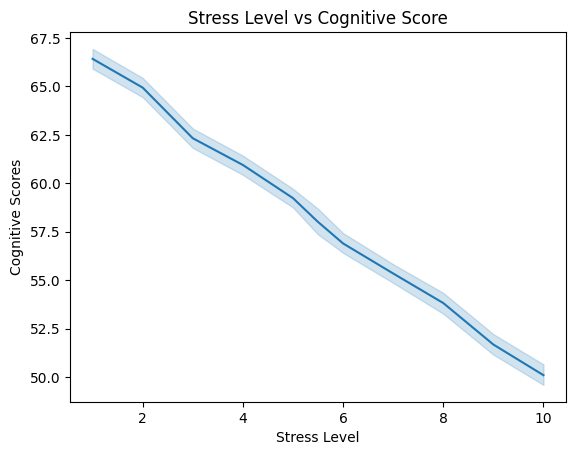

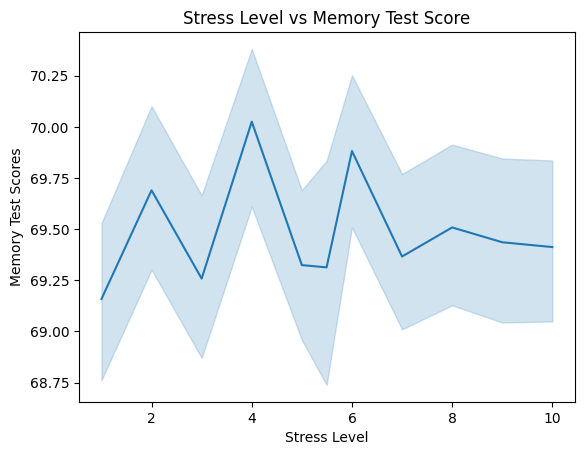

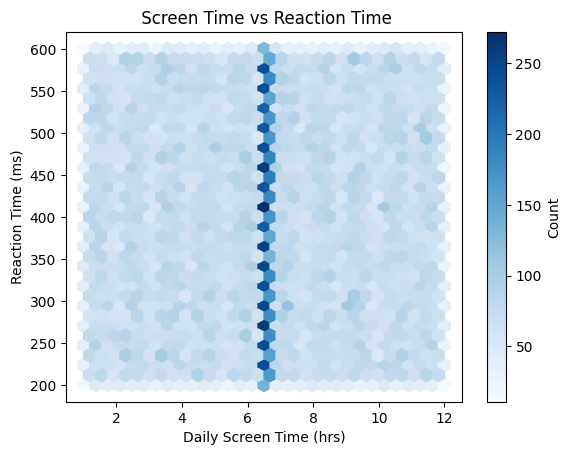

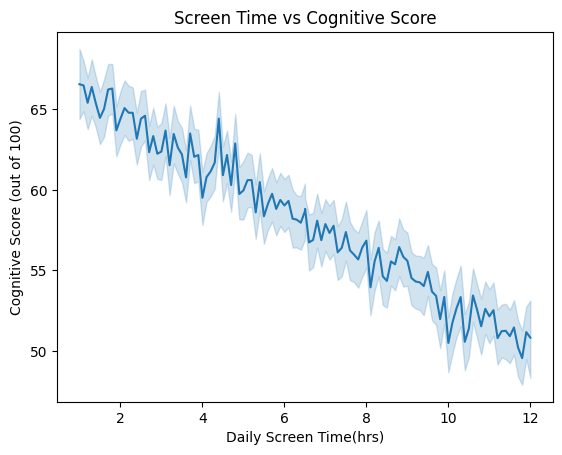

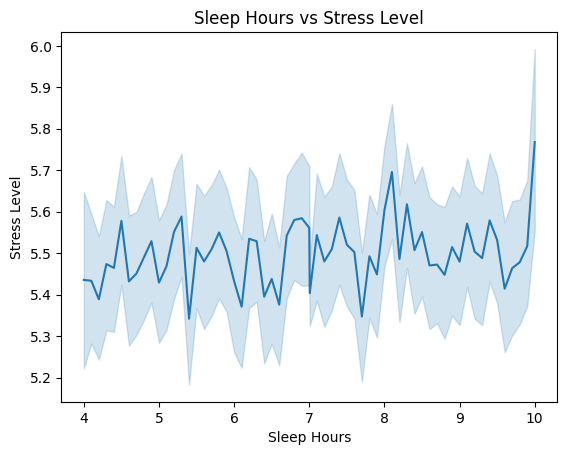

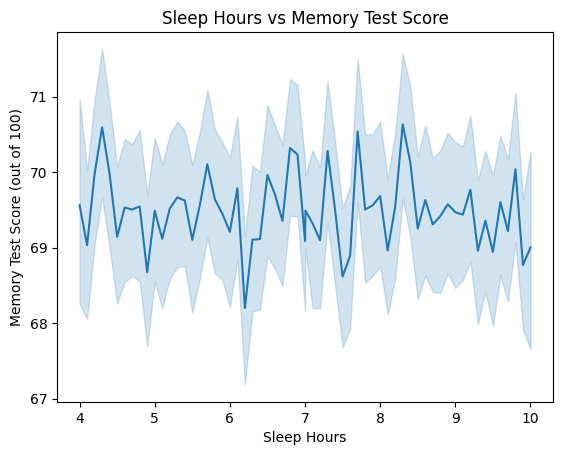

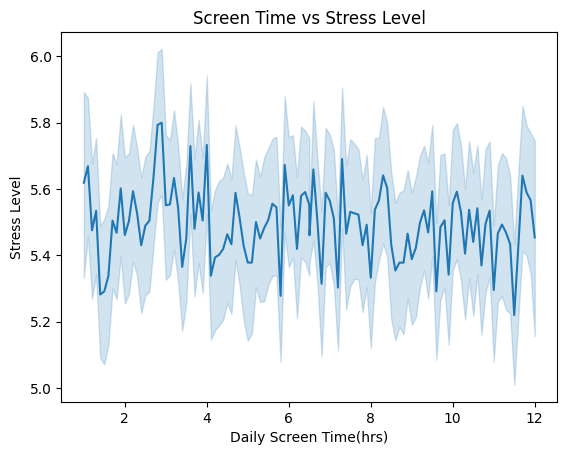

In [7]:
sns.lineplot(data=df, x='Stress Level', y='Cognitive Score (out of 100)',)
plt.title('Stress Level vs Cognitive Score')
plt.ylabel('Cognitive Scores')
plt.show()

sns.lineplot(data=df, x='Stress Level', y='Memory Test Score (out of 100)',)
plt.title('Stress Level vs Memory Test Score')
plt.ylabel('Memory Test Scores')
plt.show()

plt.hexbin(df['Daily Screen Time(hrs)'], df['Reaction Time(in ms)'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.xlabel('Daily Screen Time (hrs)')
plt.ylabel('Reaction Time (ms)')
plt.title(' Screen Time vs Reaction Time')
plt.show()

sns.lineplot(data=df, x='Daily Screen Time(hrs)',y='Cognitive Score (out of 100)')
plt.title('Screen Time vs Cognitive Score')
plt.show()

sns.lineplot(data=df, x='Sleep Hours', y='Stress Level')
plt.title('Sleep Hours vs Stress Level')
plt.show()

sns.lineplot(data=df, x='Sleep Hours', y='Memory Test Score (out of 100)')
plt.title('Sleep Hours vs Memory Test Score')
plt.show()

sns.lineplot(data=df, x='Daily Screen Time(hrs)',y='Stress Level')
plt.title('Screen Time vs Stress Level')
plt.show()




In [8]:
df.insert(6,'Diet Quality',np.nan)
diet = ['excellent','fair','poor']
df['Diet Quality'] = df['Diet Quality'].apply(lambda x:random.choice(diet)if pd.isna(x) else x)
display(df.head())
df.to_csv('Cleaned_Cognitive.csv',index=False)


,User ID,Age,Gender,Sleep Hours,Stress Level,Diet Type,Diet Quality,Daily Screen Time(hrs),Exercise Frequency,Caffeine Intake (in mg),Reaction Time(in ms),Memory Test Score (out of 100),Cognitive Score (out of 100),AI Predicted Score
0,U1,57,Female,6.5,3.0,Non-Vegetarian,excellent,6.5,Medium,41,583.33,65,36.71,39.77
1,U2,39,Female,7.6,9.0,Non-Vegetarian,fair,10.8,High,214,368.24,58,54.35,57.68
2,U3,26,Male,8.2,6.0,Vegetarian,excellent,5.7,Low,429,445.21,49,32.57,29.54
3,U4,32,Male,7.8,9.0,vegeterian,excellent,8.3,Low,464,286.33,94,70.15,74.59
4,U5,50,Male,9.7,2.0,Non-Vegetarian,poor,11.3,Medium,365,237.65,62,87.54,91.78


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

clean_df = pd.read_csv('Cleaned_Cognitive.csv')

clean_df['Exercise Frequency'] = clean_df['Exercise Frequency'].str.strip().str.lower()
clean_df['Exercise Frequency'] = clean_df['Exercise Frequency'].map(
    {
        'low':0,
        'medium':1,
        'high':2
    }
)

clean_df['Diet Quality'] = clean_df['Diet Quality'].str.strip()
clean_df['Diet Quality'] = clean_df['Diet Quality'].map(
    {
        'poor' : 0,
        'fair' : 1,
        'excellent' : 2,
    }
)

X = clean_df[['Sleep Hours', 'Stress Level', 'Daily Screen Time(hrs)', 'Memory Test Score (out of 100)','Exercise Frequency','Diet Quality']]
y = clean_df['Cognitive Score (out of 100)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

print('Job Done!')

Job Done!


In [10]:
import joblib
joblib.dump(model, "cognitive_model.pkl")

print('Job Done!')


Job Done!
